<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries </strong></center></h2>
        
</div>

In [ ]:
import numpy as np
import pandas as pd
from pandas._config import option_context
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data </strong></center></h2>
        
</div>

In [ ]:
data = pd.read_csv("/content/updated_excel.csv", encoding="ISO-8859-1", engine="c")
data.columns = ["label","text"]

In [ ]:
import os
print(os.getcwd())


/content


<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis </strong></center></h2>
        
</div>

#### Five top records of data

In [ ]:
data.head()

,label,text
0,0,i want to see my baby
1,0,Gearing up for a tainted love filled Friday! ...
2,0,missing the puppies
3,0,@MissKellyO what the hell is it? I think I'm g...
4,0,@filmmakerjoe i wish i was in vegas right now


In [ ]:
data.tail()

,label,text
29994,4,Im obsessed with urban outfitters. their cloth...
29995,4,@zestylime yup! its from that segment!
29996,4,add me on myspace http://profile.myspace.com/...
29997,4,@PushPlayNICK Haha Whoo HBO Yay Going Out Nic...
29998,4,@DianaWyatt You are being cheeky now.lol


#### Coloumns/features in data

In [ ]:
data.columns

Index(['label', 'text'], dtype='object')

#### Length of data

In [ ]:
print('lenght of data is', len(data))

lenght of data is 29999


#### Shape of data

In [ ]:
data.shape

(29999, 2)

#### Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   29999 non-null  int64 
 1   text    29999 non-null  object
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


#### Data types of all coloumns

In [ ]:
data.dtypes

label     int64
text     object
dtype: object

#### Checking Null values

In [ ]:
np.sum(data.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [ ]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   2


In [ ]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   29999


<div class="alert alert-block alert-danger">  
<h1><center><strong>Data Preparation </strong></center></h1>

 <ul style="list-style-type:circle;">
     <h6>
         <li>Selection of interested coloumns</li>
         <br>
          <li>Assinged 1 to class 4</li>
         <br>
          <li>Took one fourth data so we can run on our machine easily</li>
         <br>
          <li>Combined positive and negative tweets</li>
         <br>
    <li>We will convert the text in lower case for the further working on tweet text. </li>
         <br>
         <li>We will clean and remove the stop words(of, a, in etc) from statement because these words are not useuseful to support the labels of sentiments  data</li>
<br>
         <li>We will clean and remove the punctuations because these are the noise in the data and not meaningfull</li>
         <br>
         <li>We will clean and remove repeating characters in the words</li>
         <br>
         <li>We will clean and remove emails</li>
         <br>
         <li>We will clean and remove URL's</li>
         <br>
         <li>We will clean and remove the numbers in the data</li>
         <br>
         <li>We will apply tokenization(to separate the sentence into words)</li>
         <br>
         <li>We will apply stemming and lemmatization on the text. The concept of both is following:</li>
         <img src="htts://lh3.googleusercontent.com/3wumK8lGLhKpD2Fhbu35I7wWf6OSpF_erX9T7FX9WQCE5_HBKMJpKOZNximlzlTG5882QUWcL-_lFLJd0-RIo4uHDaO7cK8aEnw2Tm2-5xPwjYS3ls6fYefeGAVGb1WUGrXafJrC">
          <br>
         <li>We will apply stemming on the tweet text.</li>
         <br>
         <li>We will apply lemmatization on the tweet text.</li>
         <br>
         <li>Separated input feature and labels</li>
         <br>
         <li>Extracted features from input feature</li>
         <br>
         <li>Separated the 70% data for training and 30% data for testing</li>
</h6>
</ul>
   
        
</div>

#### Selecting the text and label coloumn

In [ ]:
data=data[['label','text']]

#### Assigning 1 to Positive sentment 4

In [ ]:
data['label'][data['label']==4]=1

#### Separating positive and negative tweets

In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### taking one fourth data so we can run on our machine easily

In [ ]:
data_pos = data_pos.iloc[:int(40000)]
data_neg = data_neg.iloc[:int(40000)]

#### Combining positive and negative tweets

In [ ]:
data = pd.concat([data_pos, data_neg])

#### Making statement text in lower case

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].tail()

14994    went to the zoo amphitheatre with @amyellacrea...
14995                 @__missb 21!!! wtf?! i'm only on 17 
14996    going to bed. so flippen tired. nick's in ny. ...
14997    so far, not a fan of this time zone, i feel so...
14998    @tnikolaisen for sure! i'm leaving tomorrow at...
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [ ]:
# stopwords_list = stopwords.words('english')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

14999                    @peerug puffing dragon again, ey?
15000      got twitter 4 ipod touch yaaaaaay!!!!!!!!!!!!!!
15001    @pixieguts really???? why? call superman, save...
15002    excited two sleeps wear stupid goggles bed any...
15003                                        @rln49 funny!
Name: text, dtype: object

#### Cleaning and removing punctuations

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

14994    went zoo amphitheatre amyellacreative got see ...
14995                                   missb 21 wtf im 17
14996    going bed flippen tired nicks ny miss youu  lo...
14997    far fan time zone feel disconnected twitter tw...
14998    tnikolaisen sure im leaving tomorrow 7am till ...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

14994    went zo amphitheatre amyelacreative got se shi...
14995                                    misb 21 wtf im 17
14996    going bed flipen tired nicks ny mis you lol ni...
14997    far fan time zone fel disconected twiter tweps...
14998    tnikolaisen sure im leaving tomorow 7am til mo...
Name: text, dtype: object

#### Cleaning and removing email

In [ ]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

14994    went zo amphitheatre amyelacreative got se shi...
14995                                    misb 21 wtf im 17
14996    going bed flipen tired nicks ny mis you lol ni...
14997    far fan time zone fel disconected twiter tweps...
14998    tnikolaisen sure im leaving tomorow 7am til mo...
Name: text, dtype: object

#### Cleaning and removing URL's

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

14994    went zo amphitheatre amyelacreative got se shi...
14995                                    misb 21 wtf im 17
14996    going bed flipen tired nicks ny mis you lol ni...
14997    far fan time zone fel disconected twiter tweps...
14998    tnikolaisen sure im leaving tomorow 7am til mo...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

14994    went zo amphitheatre amyelacreative got se shi...
14995                                        misb  wtf im 
14996    going bed flipen tired nicks ny mis you lol ni...
14997    far fan time zone fel disconected twiter tweps...
14998    tnikolaisen sure im leaving tomorow am til mon...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [ ]:
data['text'].head()

14999                   [perug, pufing, dragon, again, ey]
15000                      [got, twiter, ipod, touch, yay]
15001    [pixieguts, realy, why, cal, superman, save, y...
15002    [excited, two, sleps, wear, stupid, gogles, be...
15003                                          [rln, funy]
Name: text, dtype: object

#### Applying Stemming

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['text'].head()

14999                   [perug, pufing, dragon, again, ey]
15000                      [got, twiter, ipod, touch, yay]
15001    [pixieguts, realy, why, cal, superman, save, y...
15002    [excited, two, sleps, wear, stupid, gogles, be...
15003                                          [rln, funy]
Name: text, dtype: object

#### Applying Lemmatizer

In [ ]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['text'].head()

14999                   [perug, pufing, dragon, again, ey]
15000                      [got, twiter, ipod, touch, yay]
15001    [pixieguts, realy, why, cal, superman, save, y...
15002    [excited, two, sleps, wear, stupid, gogles, be...
15003                                          [rln, funy]
Name: text, dtype: object

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are labels.

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs.

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

####  Separating input feature and label

In [ ]:
X=data.text
y=data.label

#### Preparing the input features for training
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [ ]:
max_len = 500
tok = Tokenizer(num_words=200)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500.

In [ ]:
sequences_matrix.shape

(29999, 500)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 70% tweets will be used in the training
- 30% tweets will be used to test the performance of the model.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Tensorflow based model for training </strong></center></h2>   
</div>

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

# Model compilation

- First we are calling the model
- We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy"
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
- We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [ ]:
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,batch_size=120,epochs=120, validation_split=0.1)
print('Training finished !!')

Epoch 1/120
158/158 [==============================] - 11s 41ms/step - loss: 0.6618 - accuracy: 0.5970 - val_loss: 0.5897 - val_accuracy: 0.6729
Epoch 2/120
158/158 [==============================] - 4s 26ms/step - loss: 0.5836 - accuracy: 0.6861 - val_loss: 0.5753 - val_accuracy: 0.6814
Epoch 3/120
158/158 [==============================] - 4s 22ms/step - loss: 0.5776 - accuracy: 0.6903 - val_loss: 0.5735 - val_accuracy: 0.6819
Epoch 4/120
158/158 [==============================] - 3s 20ms/step - loss: 0.5757 - accuracy: 0.6914 - val_loss: 0.5726 - val_accuracy: 0.6871
Epoch 5/120
158/158 [==============================] - 3s 21ms/step - loss: 0.5733 - accuracy: 0.6931 - val_loss: 0.5740 - val_accuracy: 0.6890
Epoch 6/120
158/158 [==============================] - 4s 23ms/step - loss: 0.5734 - accuracy: 0.6918 - val_loss: 0.5730 - val_accuracy: 0.6905
Epoch 7/120
158/158 [==============================] - 3s 20ms/step - loss: 0.5750 - accuracy: 0.6917 - val_loss: 0.5730 - val_accuracy

<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

#### Testing the Trained model on test data
- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

282/282 [==============================] - 3s 10ms/step - loss: 1.7055 - accuracy: 0.6459


#### Accuracy
- Accuracy is the number of correctly classify tweets from all the tweets of positive and negative.
- For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%.
- Accuracy= Total number of correct predictions/Total number of predictions

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.65


#### Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [ ]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)

282/282 [==============================] - 2s 7ms/step


#### Confusion matrix
- These are the evaluation measures to evaluate the performance of the model.
- Dark blue boxes are the correct predictions with the trained model and sky blue boxes shows the wrong predictions.
- 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but that were actually negative sentiments.
- 4247 tweets correctly predicted as postive sentiments. 1744 tweets predicted negative sentiments but that were actually positive sentiments.



confusion matrix


[[2612 1876]
 [1311 3201]]




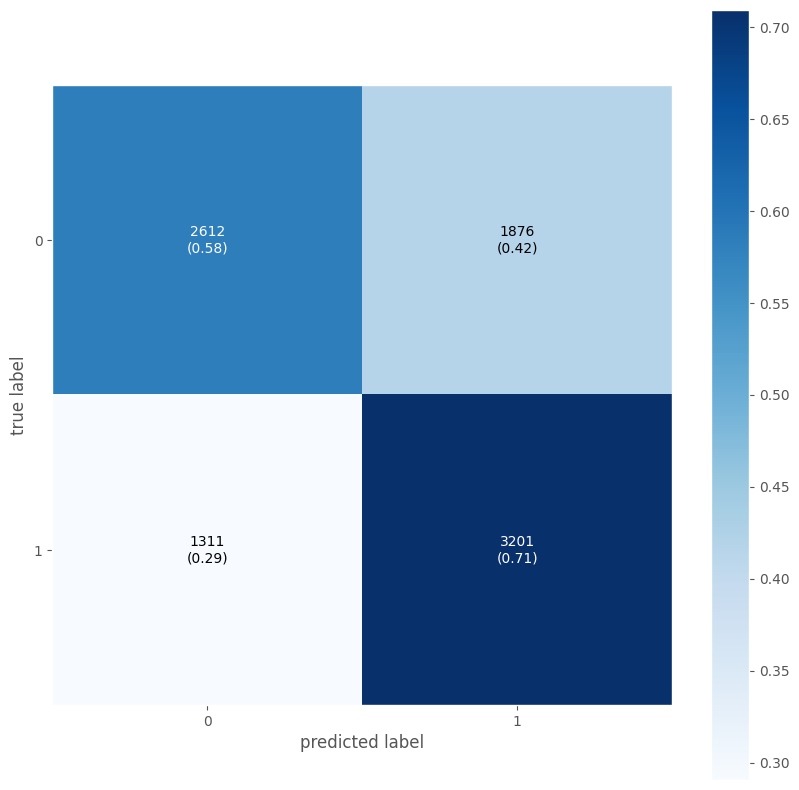

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# ROC CURVE
- ROC curve show the performance of the model as well.
- We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
- ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

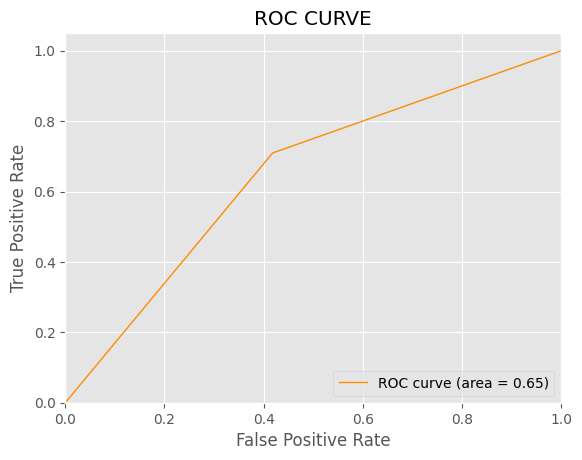

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">  
<h1><center><strong>Conclusion </strong></center></h1>
    <p>
<li>We used the twitter sentiment analysis dataset and explored the data with different ways.</li>
        <li>We prepared the text data of tweets by removing the unnecessary things.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated thye model with different evaluation measures.</li>
         <li>If you are interested to work on any text based project, you can simply apply the same methodolgy but might be you will need to change little settings like name of coloumns etc.</li>
        <li>We worked on the classification problem and sepcifically we call it binary classification which is two class classification.</li>
        </p>
</div>

In [ ]:
model.save('senti_anal_3.h5')

In [ ]:
model.predict(X_test)

282/282 [==============================] - 2s 7ms/step


array([[5.5338645e-01],
       [5.9214210e-07],
       [6.2639165e-01],
       ...,
       [9.8674822e-01],
       [1.7064709e-04],
       [1.3552174e-01]], dtype=float32)